<a href="https://colab.research.google.com/github/JamshidbekYusupov/Mohirdev_Tutorial_Codes/blob/main/Medical_Equipment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision.all import*
from ipywidgets import widgets


In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
import fastai

In [ ]:
print(fastai.__version__)

2.7.17


In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422 (from 1)
Receiving objects: 100% (422/422), 34.08 MiB | 15.33 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [ ]:
!cd OIDv4_ToolKit/ && pip install  -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1


In [ ]:
!cd OIDv4_ToolKit && python main.py -h

usage: main.py [-h] [--Dataset /path/to/OID/csv/] [-y]
               [--classes list of classes [list of classes ...]]
               [--type_csv 'train' or 'validation' or 'test' or 'all']
               [--sub Subset of human verified images or machine generated (h or m)]
               [--image_IsOccluded 1 or 0] [--image_IsTruncated 1 or 0] [--image_IsGroupOf 1 or 0]
               [--image_IsDepiction 1 or 0] [--image_IsInside 1 or 0]
               [--multiclasses 0 (default) or 1] [--n_threads [default 20]] [--noLabels]
               [--limit integer number]
               <command> 'downloader', 'visualizer' or 'ill_downloader'.

Open Image Dataset Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
                        'downloader', 'visualizer' or 'ill_downloader'.

options:
  -h, --help            show this help message and exit
  --Dataset /path/to/OID/csv/
                        Directory of the OID dataset folder
  -y, --yes

In [ ]:
## Dowonloading data for analying the Medical Equipments including Band-aid, Stethospe, Syringe, Stretcher limiting 300
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content/ --classes Band-aid Stethoscope Syringe Stretcher --type_csv train --limit 300


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Band-aid.

Band-aid
    [INFO] | Downloading train images.
    [INFO] | [INFO] Found 20 online images for train.
    [INFO] | Limiting to 300 images.
    [INFO] | All images already downloaded.
  

In [ ]:
path = Path('train')
fls = get_image_files(path)
fls

(#311) [Path('train/Band-aid/357b3dbfe11ac8af.jpg'),Path('train/Band-aid/fab3c0e214546962.jpg'),Path('train/Band-aid/2b8a3304c341303a.jpg'),Path('train/Band-aid/2288cf3dcc9d7004.jpg'),Path('train/Band-aid/00fce96bdd7a130c.jpg'),Path('train/Band-aid/23a00bea8302297e.jpg'),Path('train/Band-aid/5427dd2d545cb975.jpg'),Path('train/Band-aid/5203283efa99a952.jpg'),Path('train/Band-aid/d4ec9e9caf3f1f5d.jpg'),Path('train/Band-aid/07d5cbb866ce9281.jpg')...]

In [ ]:
failed_imgs = verify_images(path)
failed_imgs

'PosixPath' object is not iterable


(#0) []

In [ ]:
#Creatitng datablock

medics = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = Resize(224)
)

In [ ]:
##Creating Data Loaders

dls = medics.dataloaders(path)


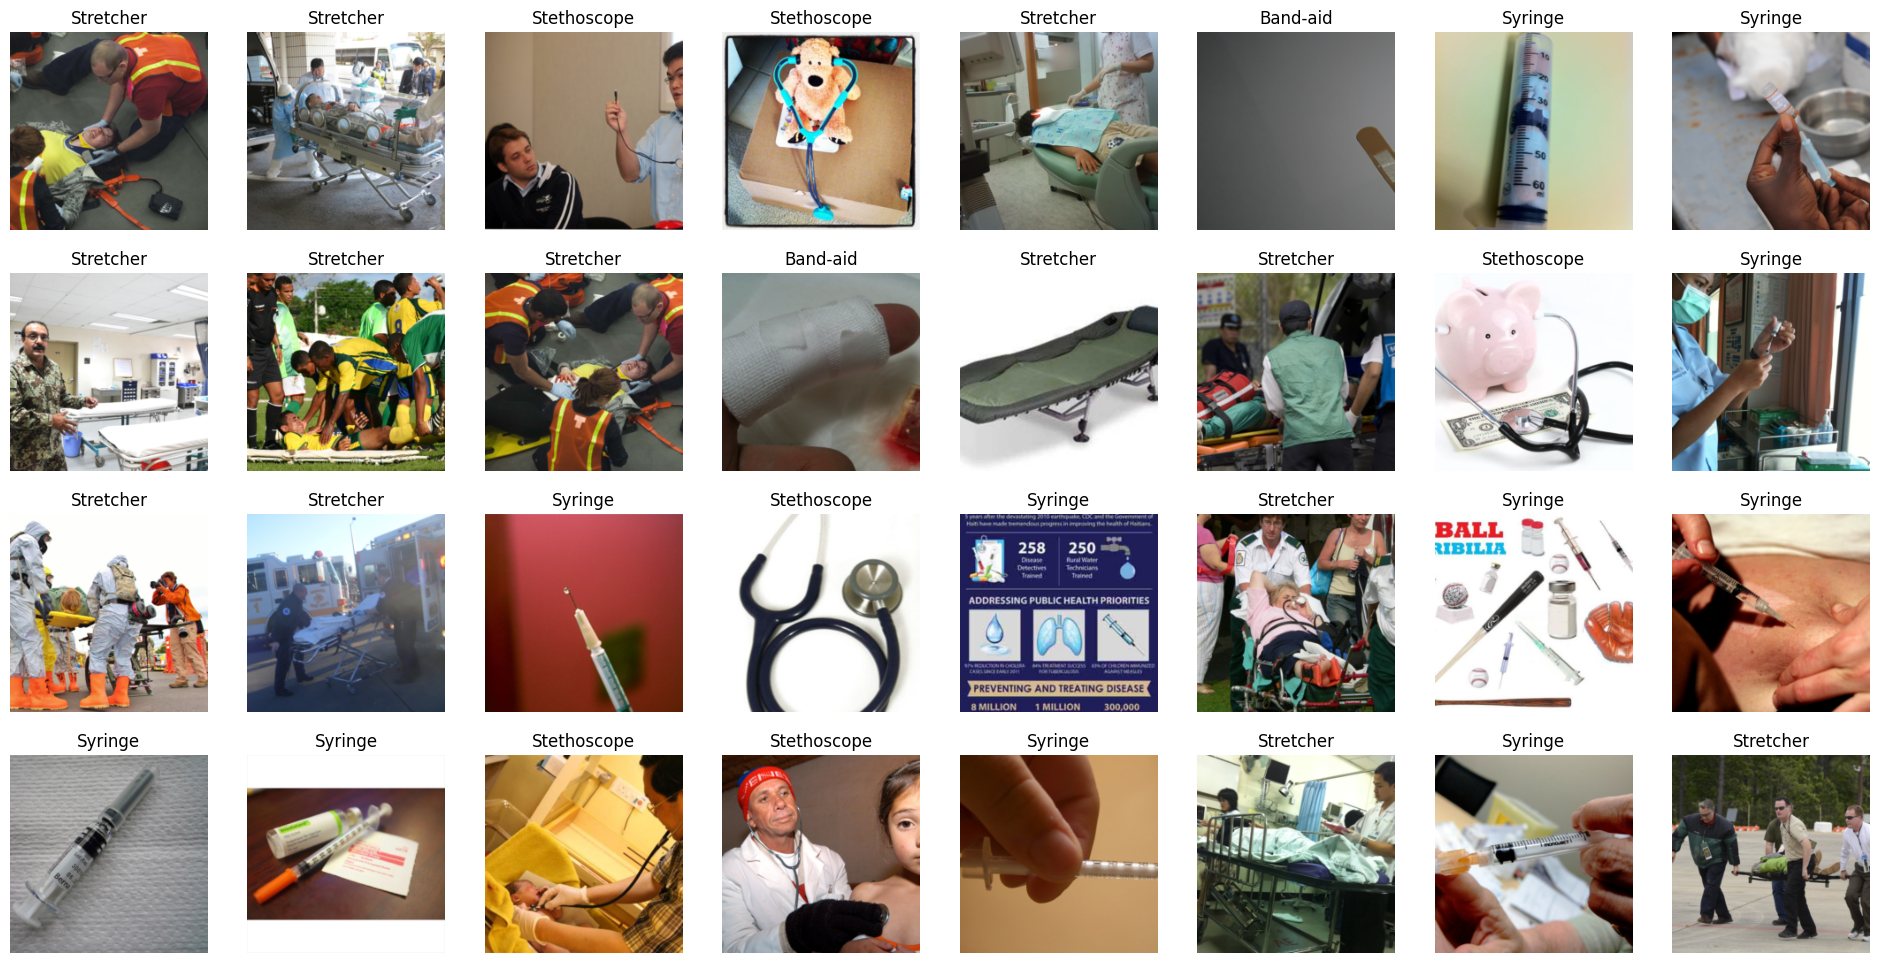

In [ ]:
dls.train.show_batch(max_n = 32, nrows = 4)

In [ ]:
##Training with cnn resnet34

learn = cnn_learner(dls, resnet34, metrics = accuracy)
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,2.367341,1.772159,0.403226,00:05


epoch,train_loss,valid_loss,accuracy,time
0,1.062462,0.572531,0.790323,00:04
1,0.748396,0.356375,0.854839,00:05
2,0.545069,0.309239,0.870968,00:04
3,0.411238,0.294410,0.887097,00:04


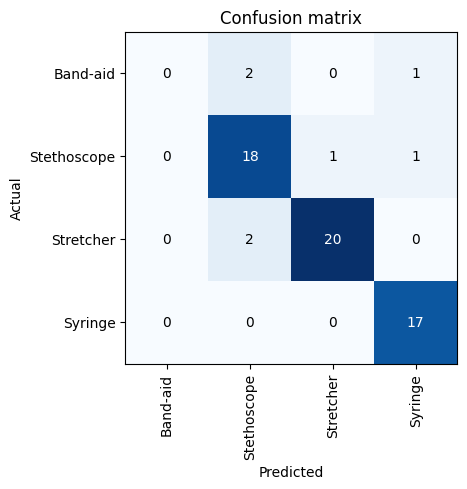

In [ ]:
inter = ClassificationInterpretation.from_learner(learn)
inter.plot_confusion_matrix()

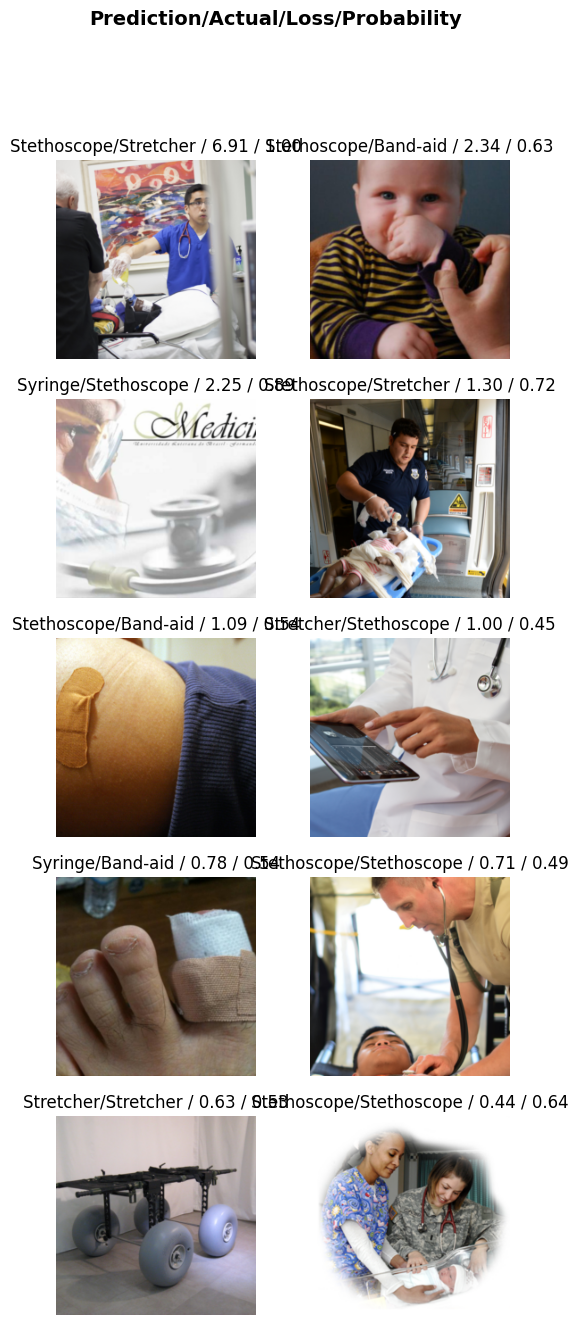

In [ ]:
inter.plot_top_losses(10, nrows = 5)

In [38]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Prediction:Syringe
Probability:100.0%


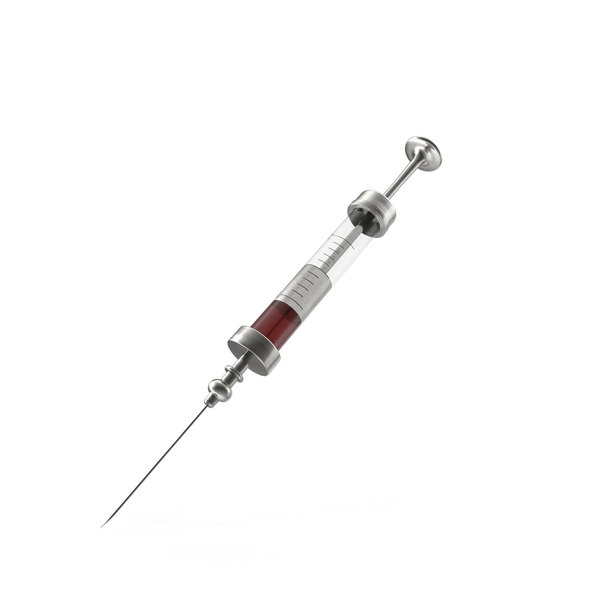

In [40]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f"Prediction:{pred}")
print(f"Probability:{probs[pred_id]*100:.01f}%")
img

In [35]:
learn.export('medequipment_model.pkl')

In [36]:
model = load_learner('/content/medequipment_model.pkl')

In [41]:
model.predict(img)

('Syringe',
 tensor(3),
 tensor([1.5406e-05, 4.1994e-06, 3.0939e-07, 9.9998e-01]))